# FUNDAMENTOS DEL APRENDIZAJE AUTOMÁTICO

## 1. Introducción al Aprendizaje Automático

El **aprendizaje automático** (Machine Learning, ML) es una rama de la inteligencia artificial que busca desarrollar algoritmos capaces de **aprender patrones** a partir de datos y **mejorar su desempeño con la experiencia**.

Formalmente, siguiendo a Mitchell (1997):

> Un programa aprende de una experiencia $E$ con respecto a una clase de tareas $T$ y una medida de rendimiento $P$, si su rendimiento en las tareas en $T$, medido por $P$, mejora con la experiencia $E$.

### Ejemplo
Un clasificador de correos electrónicos ($T$: clasificación), que mejora su precisión ($P$) al procesar más mensajes ($E$), está realizando aprendizaje automático.

El flujo básico en ML incluye:
1. Adquisición y preparación de datos.
2. Selección del modelo.
3. Entrenamiento del modelo.
4. Evaluación y ajuste.
5. Predicción e interpretación de resultados.

In [1]:
# Ejemplo simple: Clasificación binaria con árbol de decisión
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Cargar datos
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Entrenamiento
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Evaluación
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.965


## 2. Tipos de Algoritmos en Aprendizaje Automático

Los algoritmos se clasifican según la disponibilidad de etiquetas en los datos:

| Tipo | Descripción | Ejemplos |
|------|--------------|-----------|
| **Supervisado** | Los datos están etiquetados. | Regresión lineal, Árboles de decisión, SVM |
| **No supervisado** | No hay etiquetas; se busca estructura oculta. | k-Means, PCA, DBSCAN |
| **Semi-supervisado** | Combinación de datos etiquetados y no etiquetados. | Autoencoders, Label Propagation |
| **Por refuerzo** | El agente aprende mediante recompensas. | Q-Learning, Deep Q-Network |

### Formalización del Aprendizaje Supervisado
Dado un conjunto de entrenamiento:
\begin{equation}
\mathcal{D} = \{(x_i, y_i)\}_{i=1}^n \quad \text{con} \quad x_i \in \mathbb{R}^d,\; y_i \in \mathbb{R} \text{ o } \{1, \dots, K\}
\end{equation}
Buscamos una función $f(x)$ parametrizada (modelo) que minimice el error esperado:
\begin{equation}
R(f) = \mathbb{E}_{(x,y)\sim p(x,y)} [L(y, f(x))]
\end{equation}
donde $L(y, f(x))$ es la función de pérdida (por ejemplo, error cuadrático o entropía cruzada).

In [2]:
# Ejemplo: Regresión lineal supervisada
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

MSE: 3424.259


## 3. Terminología Clave

| Término | Descripción |
|----------|-------------|
| **Instancia** | Un ejemplo o fila de datos. |
| **Atributos (features)** | Variables explicativas. |
| **Etiqueta (target)** | Valor a predecir. |
| **Modelo** | Representación matemática del conocimiento aprendido. |
| **Entrenamiento** | Proceso de ajuste de parámetros. |
| **Overfitting** | El modelo aprende demasiado los datos de entrenamiento. |
| **Generalización** | Capacidad del modelo para predecir datos nuevos. |

## 4. Tipos de Datos

Los datos pueden clasificarse según su naturaleza:

- **Numéricos:** continuos o discretos.
- **Categóricos:** nominales u ordinales.
- **Textuales:** secuencias de palabras.
- **Estructurados / no estructurados:** tablas vs. imágenes o texto libre.

### Ejemplo: Preprocesamiento básico de datos categóricos


In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({
    'Color': ['Rojo', 'Verde', 'Azul', 'Rojo'],
    'Tamaño': ['S', 'M', 'L', 'M']
})

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df)
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(df.columns))
encoded_df.head()

,Color_Azul,Color_Rojo,Color_Verde,Tamaño_L,Tamaño_M,Tamaño_S
0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0


## 5. Problemas en el Aprendizaje Automático

- **Sobreajuste (Overfitting):** el modelo memoriza los datos.
- **Subajuste (Underfitting):** el modelo es demasiado simple.
- **Datos desbalanceados:** clases con muy pocos ejemplos.
- **Datos ruidosos o incompletos.**
- **Selección inadecuada de características.**

### Ejemplo: Visualización de overfitting


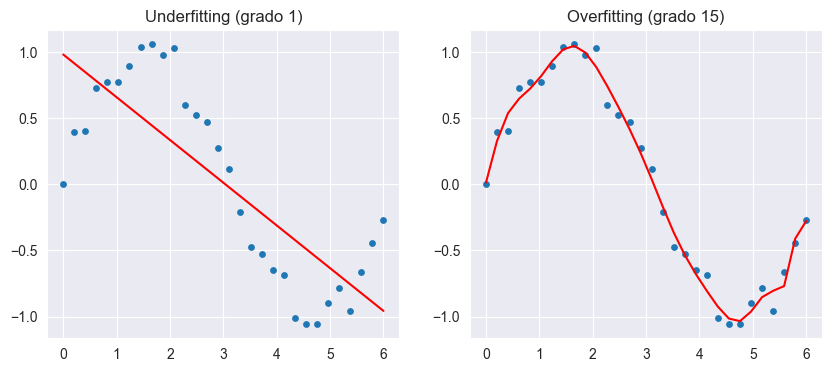

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Datos simulados
X = np.linspace(0, 6, 30).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

models = [make_pipeline(PolynomialFeatures(d), LinearRegression()) for d in [1, 15]]
titles = ['Underfitting (grado 1)', 'Overfitting (grado 15)']

plt.figure(figsize=(10,4))
for i, model in enumerate(models):
    plt.subplot(1,2,i+1)
    model.fit(X, y)
    plt.scatter(X, y, s=15)
    plt.plot(X, model.predict(X), color='red')
    plt.title(titles[i])
plt.show()

## 6. Tareas Clave del Aprendizaje Automático

Las tareas principales incluyen:

- **Clasificación:** asignar una etiqueta discreta.  
- **Regresión:** predecir un valor continuo.  
- **Agrupamiento (Clustering):** encontrar grupos naturales.  
- **Reducción de dimensionalidad:** comprimir datos preservando información.  
- **Recomendación:** predecir preferencias o relaciones.

### Ejemplo: Clasificación con k-NN


In [5]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



---
### Bibliografía recomendada
- Mitchell, T. (1997). *Machine Learning*. McGraw-Hill.
- Bishop, C. (2006). *Pattern Recognition and Machine Learning*. Springer.
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*. Springer.